## Experiment on sales scheme

In [1]:
import matplotlib.pyplot as plt

### Connect to the database

In [2]:
%run connection.ipynb

Connecting with connection string : postgresql://postgres:letmein@db:5432/Adventureworks
 * postgresql://postgres:***@db:5432/Adventureworks
1 rows affected.
 * postgresql://postgres:***@db:5432/Adventureworks
1 rows affected.
 * postgresql://postgres:***@db:5432/Adventureworks
68 rows affected.


### What are the sales by month?

In [3]:
%%sql yearly_month_sales_df <<

WITH daily_sales AS (
    SELECT
        soh.orderdate,
        EXTRACT(year FROM soh.orderdate)::int AS year,
        EXTRACT(month FROM soh.orderdate)::int AS month,
        SUM(soh.subtotal)::int AS total
    FROM sales.salesorderheader soh
    GROUP BY 1
)

SELECT ds.year, ds.month, SUM(ds.total) AS total FROM daily_sales ds
GROUP BY 1,2
ORDER BY 1,2

 * postgresql://postgres:***@db:5432/Adventureworks
38 rows affected.
Returning data to local variable yearly_month_sales_df


In [4]:
yearly_month_sales_df

,year,month,total
0,2011,5,503806
1,2011,6,458913
2,2011,7,2044600
3,2011,8,2495818
4,2011,9,502074
5,2011,10,4588762
6,2011,11,737841
7,2011,12,1309864
8,2012,1,3970627
9,2012,2,1475428


/tmp/ipykernel_23441/2485619661.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


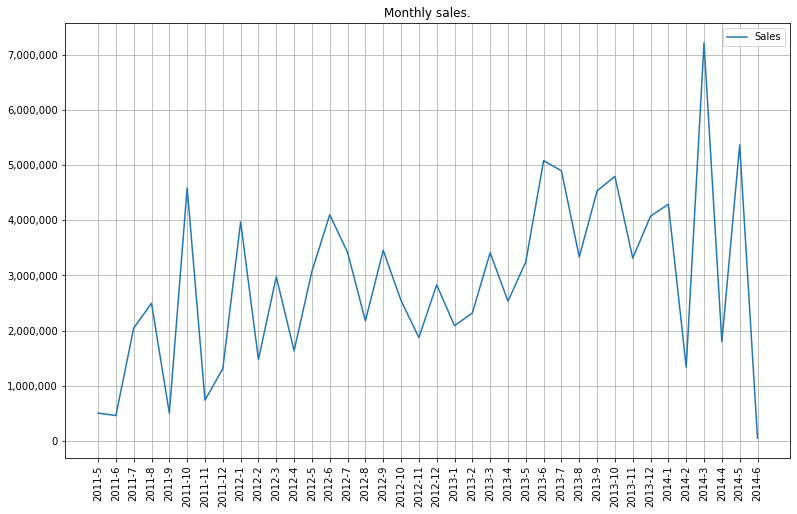

In [5]:
data = yearly_month_sales_df['total']
labels = yearly_month_sales_df[['year', 'month']].astype('str').agg('-'.join, axis=1)

fig, ax = plt.subplots(figsize=(13, 8))

ax.plot(labels, data, label='Sales')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
ax.set_title('Monthly sales.')
ax.grid(True)
ax.legend()

plt.xticks(rotation=90)
plt.show()

### What are the sales by salesperson?

In [6]:
%%sql sales_by_sales_person <<

SELECT
    SUM(soh.totaldue) AS total,
    sp.businessentityid AS sales_person

FROM sales.salesorderheader soh
INNER JOIN sales.salesperson sp ON sp.businessentityid = soh.salespersonid

GROUP BY 2
ORDER BY 2



 * postgresql://postgres:***@db:5432/Adventureworks
17 rows affected.
Returning data to local variable sales_by_sales_person


In [7]:
sales_by_sales_person

,total,sales_person
0,1.235934e+06,274
1,1.047537e+07,275
2,1.169502e+07,276
3,1.134239e+07,277
4,4.069422e+06,278
5,8.086074e+06,279
6,3.748246e+06,280
7,7.259568e+06,281
8,6.683537e+06,282
9,4.207895e+06,283


/tmp/ipykernel_23441/1291263918.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


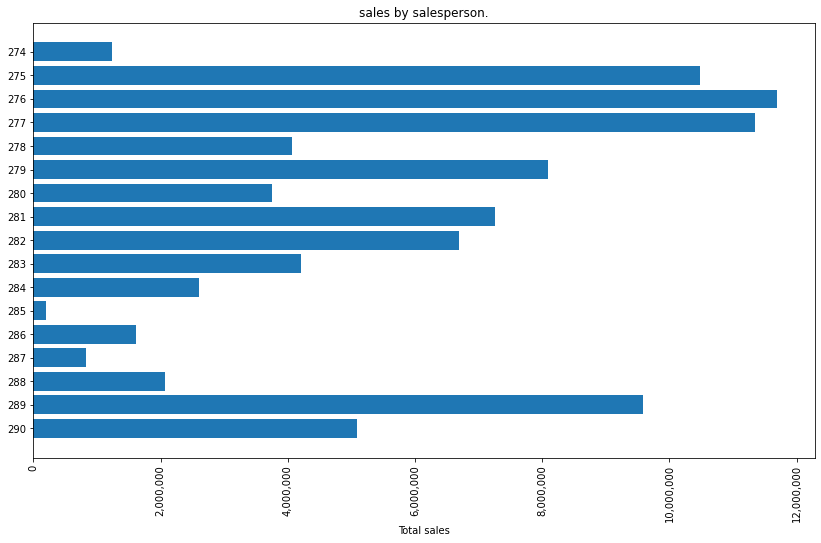

In [8]:
sales_people = sales_by_sales_person['sales_person']
total = sales_by_sales_person['total']

fig, ax = plt.subplots(figsize=(14, 8))

ax.barh(sales_people, total, align='center')
ax.set_yticks(sales_people)
ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
ax.invert_yaxis()
ax.set_xlabel('Total sales')
ax.set_title('sales by salesperson.')

plt.xticks(rotation=90)
plt.show()

### What are the sales by territory?

In [9]:
%%sql sales_by_territory_df <<

SELECT
    SUM(soh.totaldue) AS total,
    t.name AS territory

FROM sales.salesorderheader soh
INNER JOIN sales.salesterritory t ON t.territoryid = soh.territoryid

GROUP BY 2
ORDER BY 2

 * postgresql://postgres:***@db:5432/Adventureworks
10 rows affected.
Returning data to local variable sales_by_territory_df


In [10]:
sales_by_territory_df

,total,territory
0,1.181438e+07,Australia
1,1.839893e+07,Canada
2,8.913299e+06,Central
3,8.119749e+06,France
4,5.479820e+06,Germany
5,7.820210e+06,Northeast
6,1.806166e+07,Northwest
7,8.884099e+06,Southeast
8,2.715059e+07,Southwest
9,8.574049e+06,United Kingdom


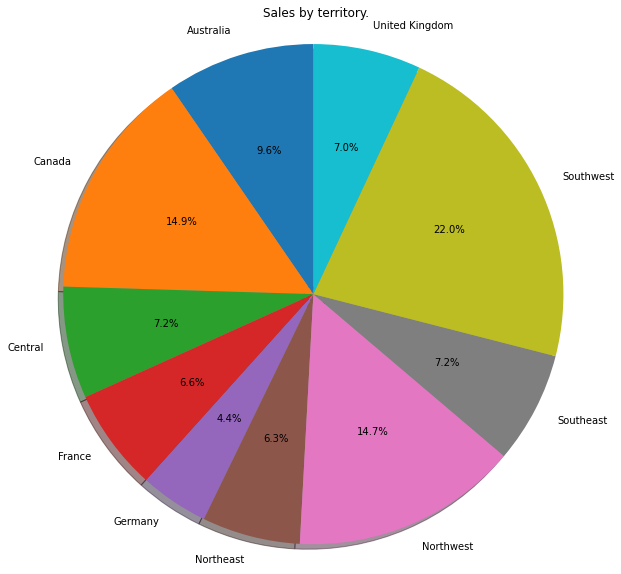

In [11]:
data = sales_by_territory_df['total']
labels = sales_by_territory_df['territory']

fig, ax = plt.subplots(figsize=(10, 10))

ax.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
        
ax.set_title('Sales by territory.')    
ax.axis('equal')

plt.show()

### What are the top ten most spent customers?

In [12]:
%%sql

SELECT
    SUM(soh.totaldue) AS total_spent,
    c.customerid AS customer
FROM sales.salesorderheader soh
INNER JOIN sales.customer c ON c.customerid = soh.customerid

GROUP BY 2
ORDER BY 1 DESC
LIMIT 10

 * postgresql://postgres:***@db:5432/Adventureworks
10 rows affected.


,total_spent,customer
0,989184.0820,29818
1,961675.8596,29715
2,954021.9235,29722
3,919801.8188,30117
4,901346.8560,29614
5,887090.4106,29639
6,841866.5522,29701
7,834475.9271,29617
8,824331.7682,29994
9,820383.5466,29646


### What are customers last order?

In [13]:
%%sql

WITH sales_by_order_number AS (
    SELECT
        soh.salesorderid,
        c.customerid,
        sod.productid,
        p.name AS product_name,
        row_number() OVER(PARTITION BY c.customerid ORDER BY soh.salesorderid DESC) order_number
    FROM sales.salesorderheader soh
    INNER JOIN sales.customer c ON c.customerid = soh.customerid
    INNER JOIN sales.salesorderdetail sod ON sod.salesorderid = soh.salesorderid
    INNER JOIN production.product p ON p.productid = sod.productid
    GROUP BY 1,2,3,4
    ORDER BY 2
)

SELECT
    son.customerid,
    son.product_name
FROM sales_by_order_number son
WHERE son.order_number = 1

 * postgresql://postgres:***@db:5432/Adventureworks
19119 rows affected.


,customerid,product_name
0,11000,"Touring-1000 Blue, 46"
1,11001,Water Bottle - 30 oz.
2,11002,"Sport-100 Helmet, Blue"
3,11003,"Touring-1000 Yellow, 60"
4,11004,"Sport-100 Helmet, Black"
...,...,...
19114,30114,"ML Mountain Frame-W - Silver, 46"
19115,30115,"Road-550-W Yellow, 48"
19116,30116,HL Bottom Bracket
19117,30117,Hydration Pack - 70 oz.
